In [1]:
import pandas as pd
df = pd.read_csv("data.csv")

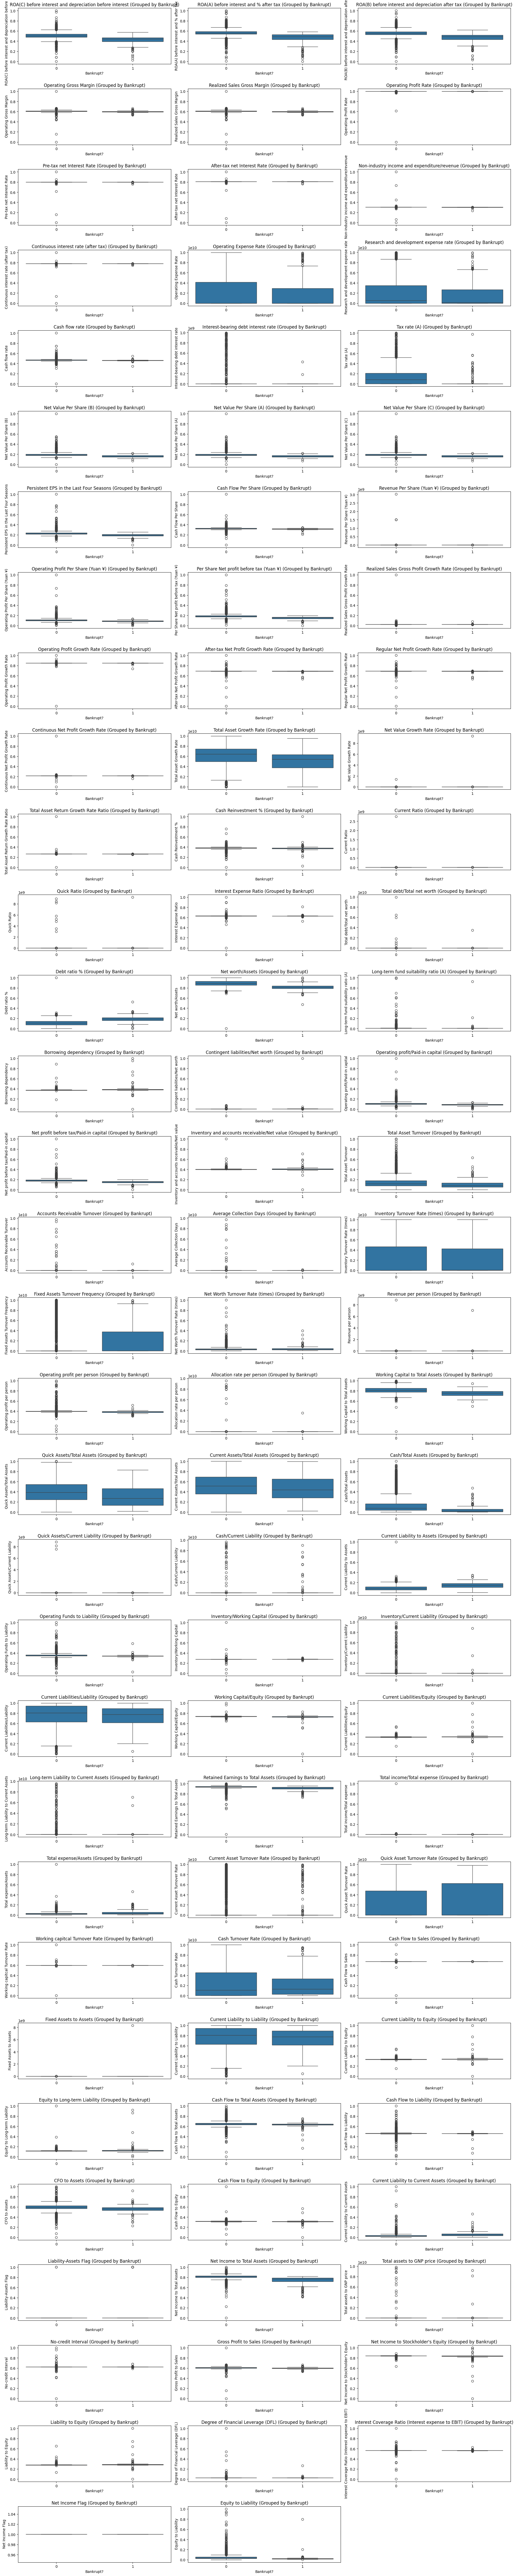

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df_features = df.drop(columns=["Bankrupt?"])
# Separate the data into two groups based on the 'Bankrupt?' class
df_non_bankrupt = df[df['Bankrupt?'] == 0].drop(columns=['Bankrupt?'])
df_bankrupt = df[df['Bankrupt?'] == 1].drop(columns=['Bankrupt?'])

# Create a figure with subplots for each column to plot boxplots, grouped by the class
plt.figure(figsize=(20, 100))
for i, column in enumerate(df_features.columns, 1):
    plt.subplot(len(df_features.columns)//3 + 1, 3, i)
    sns.boxplot(data=df, x='Bankrupt?', y=column)
    plt.title(f"{column.strip()} (Grouped by Bankrupt)")
    plt.tight_layout()

plt.show()

In [3]:
import pandas as pd
import numpy as np

# Convert all columns to numeric, removing commas and spaces first
def convert_to_numeric(df):
    for column in df.columns:
        # Remove any commas or spaces that might cause conversion issues
        df[column] = df[column].astype(str).str.replace(',', '').str.strip()
        # Convert to numeric, coercing errors to NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# Function to scale down values greater than 1 in all columns
def scale_down_all_columns(df):
    for column in df.columns:
        def scale_down(value):
            # Only process if the value is numeric, not NaN, and greater than 1
            if pd.notna(value) and value > 1:
                num_digits = len(str(int(value)))  # Count the number of digits before decimal point
                return value / (10 ** num_digits)  # Scale down the value to between 0 and 1
            else:
                return value  # Return the value as-is if it's NaN or <= 1

        # Apply the scale_down function to all values in the column
        df[column] = df[column].apply(scale_down)
    
    return df

# Example usage:
# First, convert all object columns to numeric and handle commas, spaces
df_features = convert_to_numeric(df_features)

# Now, apply the scaling logic to all numeric columns
df_scaled_all_columns = scale_down_all_columns(df_features)

# Display the cleaned dataframe with scaled-down values
print(df_scaled_all_columns.head())

   ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                   

In [4]:
# Find rows where values are outside the range [0, 1]
outside_range = (df_features < 0) | (df_features > 1)

# Extract the rows with values outside the 0-1 range
outside_values = df_features[outside_range.any(axis=1)]
print(outside_values)
len(df_scaled_all_columns) == len(df_features)

Empty DataFrame
Columns: [ ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value 

True

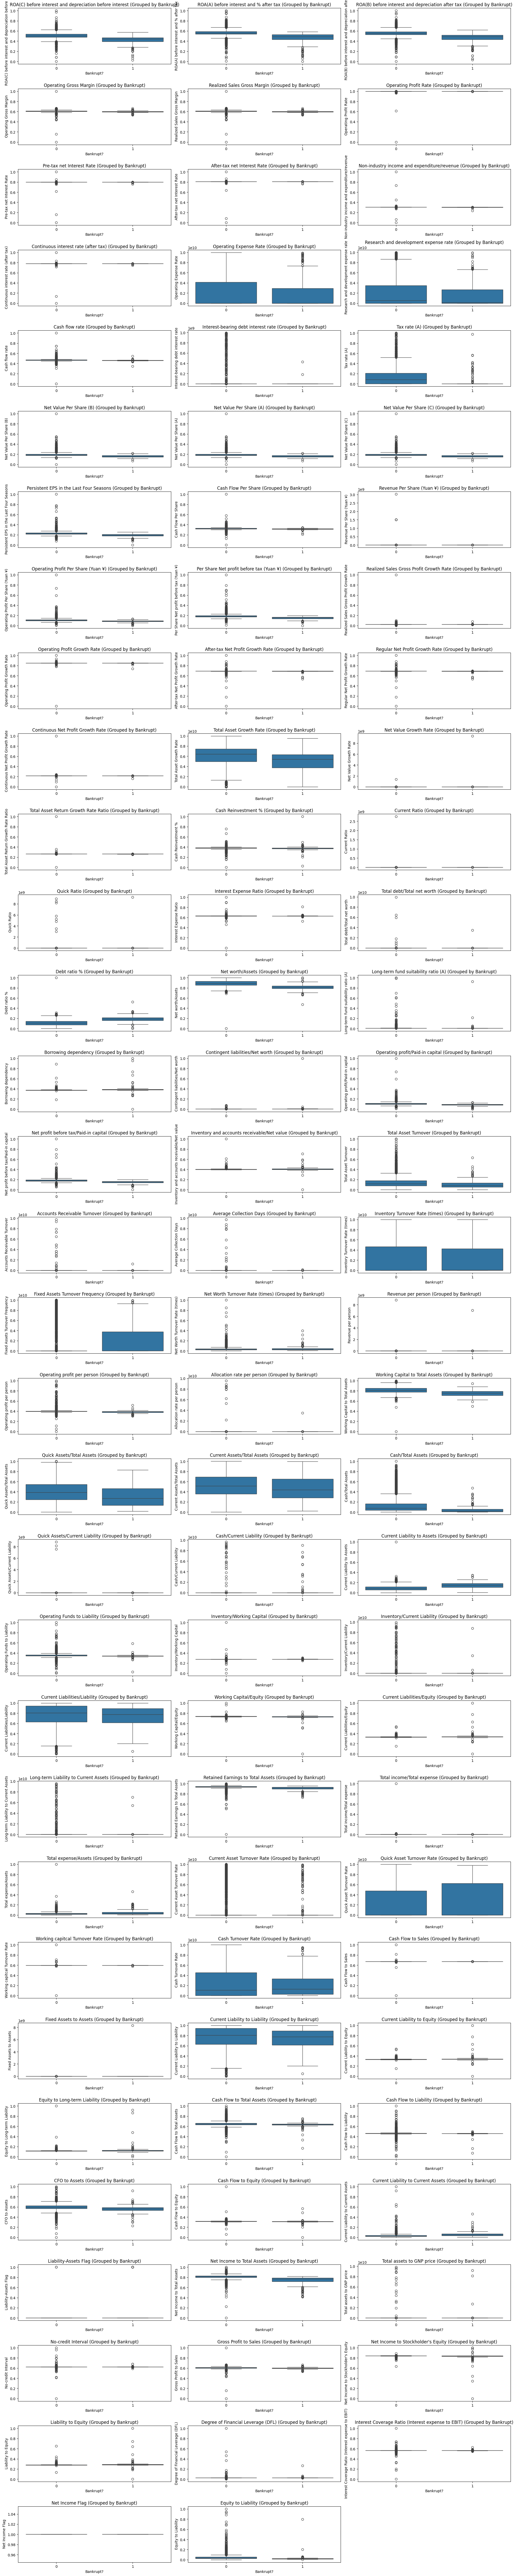

In [5]:
# Create a figure with subplots for each column to plot boxplots, grouped by the class
plt.figure(figsize=(20, 100))
for i, column in enumerate(df_features.columns, 1):
    plt.subplot(len(df_features.columns)//3 + 1, 3, i)
    sns.boxplot(data=df, x='Bankrupt?', y=column)
    plt.title(f"{column.strip()} (Grouped by Bankrupt)")
    plt.tight_layout()

plt.show()